## Imports

In [1]:
import numpy as np
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("Sepehr")

In [3]:
tf.__version__

'2.0.0'

## Data

In [7]:
X, y = make_classification(n_samples=50000, n_features=2, n_classes=2,
                           n_clusters_per_class=1,
                           n_informative=1, n_redundant=0)

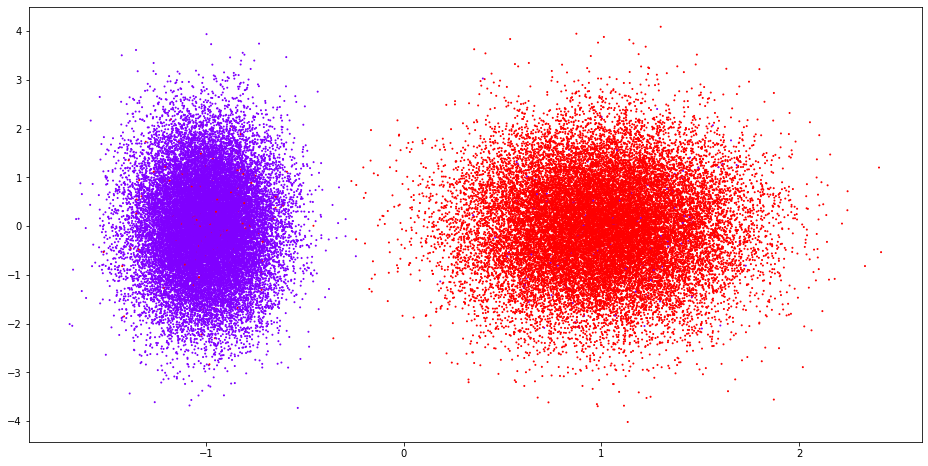

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=1)

In [9]:
X

array([[ 1.47127714,  0.23681198],
       [-1.16788111,  2.00089409],
       [ 1.24707687,  1.27915865],
       ...,
       [ 1.16672114,  0.05231224],
       [-1.23654589,  0.20884569],
       [ 1.40791394,  0.53012245]])

In [10]:
y[0:5]

array([1, 0, 1, 1, 1])

### Training/Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Training dataset

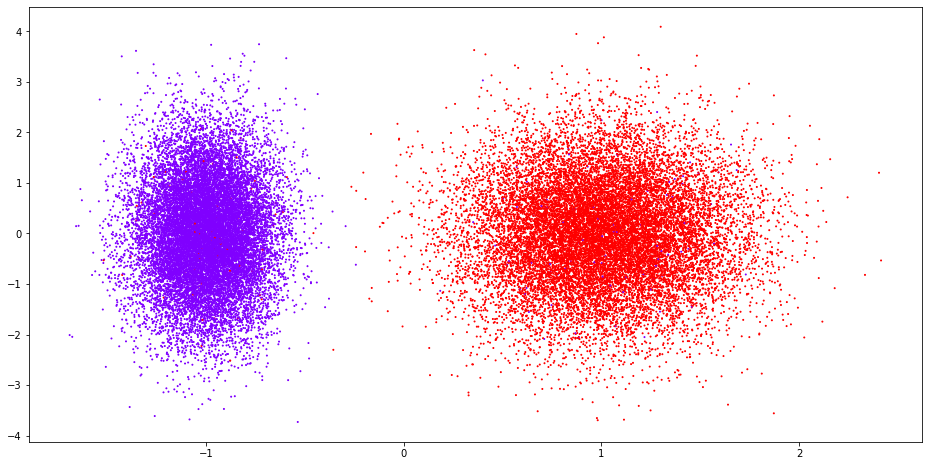

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow', s=1)

#### Test dataset

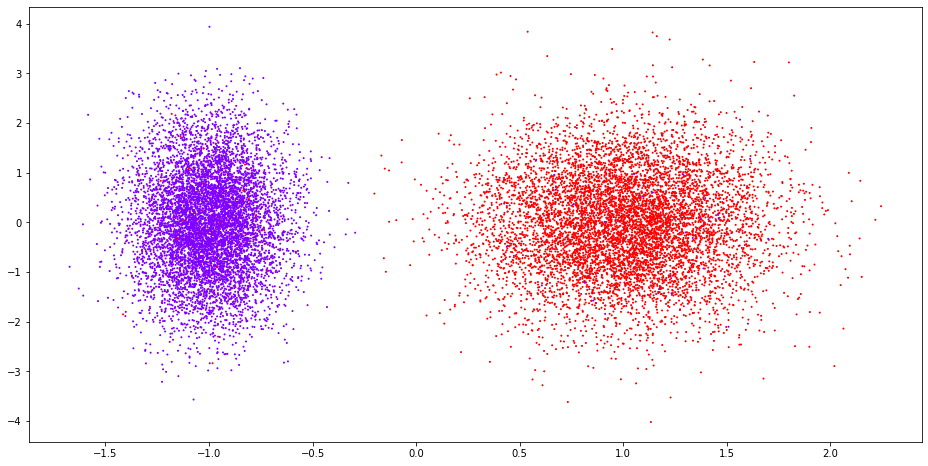

In [13]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow', s=1)

### One Hot Encoding

In [14]:
y_train = np.array([y_train, -(y_train-1)]).T
y_test = np.array([y_test, -(y_test-1)]).T

In [16]:
y_train[0:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]])

## Neural Network

In [59]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

In [60]:
model.compile(optimizer='adam', loss="mse" , metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train)

35000/35000 [==============================] - 2s 44us/sample - loss: 0.0093 - acc: 0.99021s - loss


In [62]:
result = model.predict(X_test[0:10])

In [63]:
result = result[:, 1]

In [64]:
np.round(result)

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [65]:
y_test[0:10, 1]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0])